In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld import standard_grid, negative_grid
from iterative_policy_evaluation_probabilistic import print_values, print_policy

In [2]:
SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALPHA = 0.1
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [3]:
def epsilon_greedy(policy, s, eps=0.1):
  # we'll use epsilon-soft to ensure all states are visited
  # what happens if you don't do this? i.e. eps=0
  p = np.random.random()
  if p < (1 - eps):
    return policy[s]
  else:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)

In [4]:
# use the standard grid again (0 for every step) so that we can compare
# to iterative policy evaluation
grid = standard_grid()

# print rewards
print("rewards:")
print_values(grid.rewards, grid)


rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|


In [5]:
# state -> action
policy = {
(2, 0): 'U',
(1, 0): 'U',
(0, 0): 'R',
(0, 1): 'R',
(0, 2): 'R',
(1, 2): 'R',
(2, 1): 'R',
(2, 2): 'R',
(2, 3): 'U',
}

# initialize V(s) and returns
V = {}
states = grid.all_states()
for s in states:
    V[s] = 0

In [6]:
# store max change in V(s) per episode
deltas = []

# repeat until convergence
n_episodes = 10000
for it in range(n_episodes):
    # begin a new episode
    s = grid.reset()
    
    delta = 0
    while not grid.game_over():
        a = epsilon_greedy(policy, s)

        r = grid.move(a)
        s_next = grid.current_state()

        # update V(s)
        v_old = V[s]
        V[s] = V[s] + ALPHA*(r + GAMMA*V[s_next] - V[s])
        delta = max(delta, np.abs(V[s] - v_old))

        # next state becomes current state
        s = s_next

    # store delta
    deltas.append(delta)
    

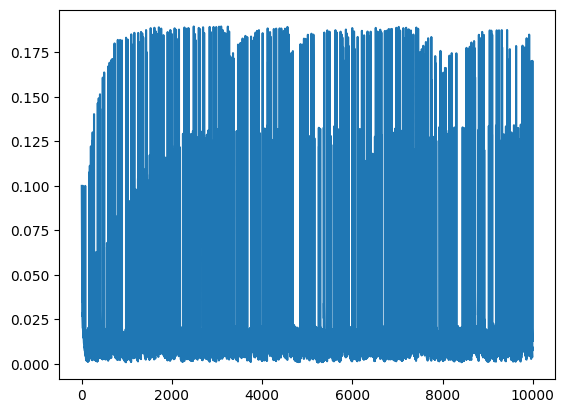

In [7]:
plt.plot(deltas)
plt.show()


In [8]:
print("values:")
print_values(V, grid)
print("policy:")
print_policy(policy, grid)

values:
---------------------------
 0.73| 0.80| 0.88| 0.00|
---------------------------
 0.66| 0.00|-0.83| 0.00|
---------------------------
 0.58|-0.80|-0.89|-0.98|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  U  |  R  |  R  |  U  |
